Chapter 6
# 季节调整
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader 
import scipy.stats as stats

DATE
2000-08-01   NaN
2000-09-01   NaN
2000-10-01   NaN
2000-11-01   NaN
2000-12-01   NaN
              ..
2021-04-01   NaN
2021-05-01   NaN
2021-06-01   NaN
2021-07-01   NaN
2021-08-01   NaN
Name: trend, Length: 253, dtype: float64

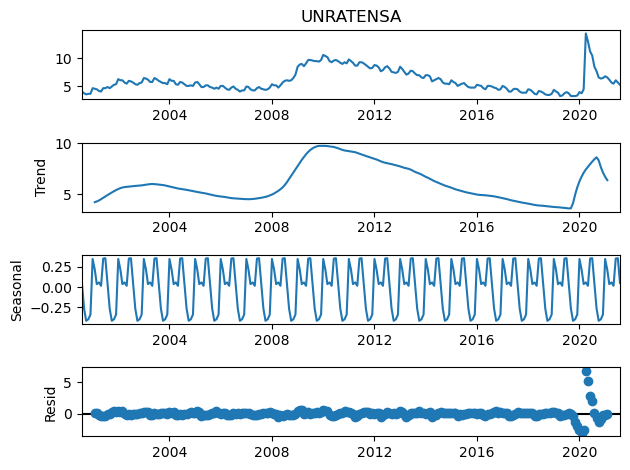

In [2]:
df = pandas_datareader.data.DataReader(['UNRATENSA'], data_source='fred', start='08-01-2000', end='08-01-2021')
df = df.dropna()

# deal with missing values
df['UNRATENSA'].interpolate(inplace=True)

res = sm.tsa.seasonal_decompose(df['UNRATENSA'])

# generate subplots
resplot = res.plot()

res.resid
res.seasonal
res.trend

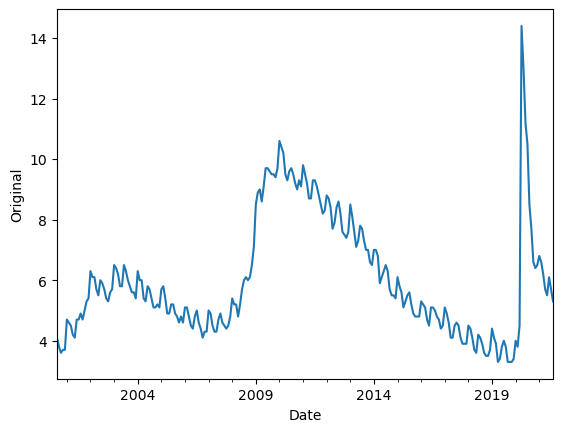

In [3]:
#%% Original data

fig, axs = plt.subplots()

df['UNRATENSA'].plot()
plt.xlabel('Date')
plt.ylabel('Original')
plt.show()

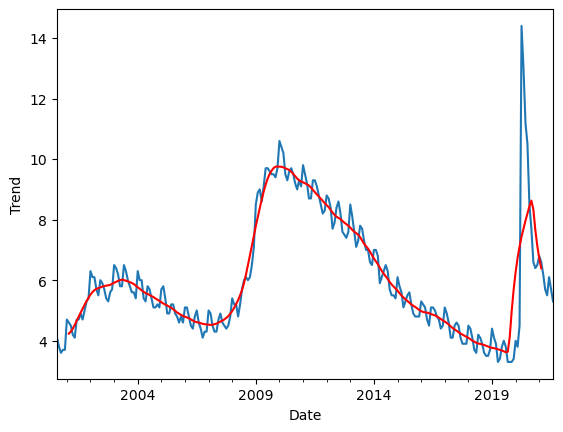

In [4]:
#%% plot trend on top of original curve

df['UNRATENSA'].plot()
res.trend.plot(color = 'r')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.show()

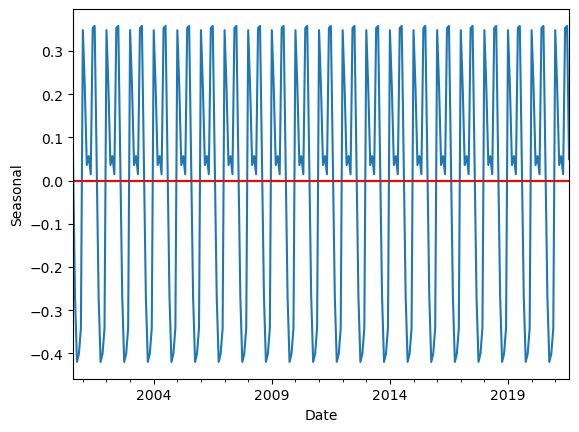

In [5]:
#%% plot seasonal component

fig, axs = plt.subplots()

res.seasonal.plot()
plt.axhline(y = 0, color = 'r')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.show()

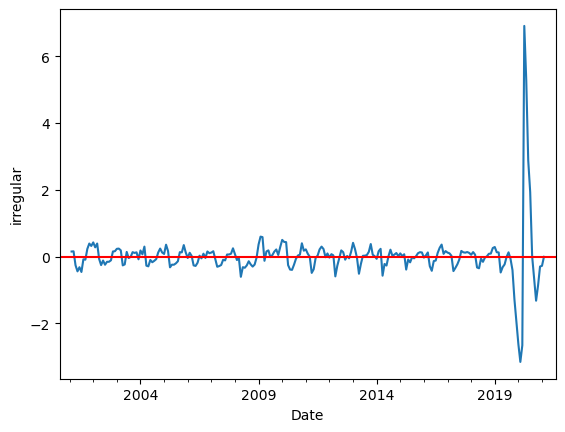

In [6]:
#%% plot irregular

fig, axs = plt.subplots()

res.resid.plot()
plt.axhline(y = 0, color = 'r')
plt.xlabel('Date')
plt.ylabel('irregular')
plt.show()